In [88]:
import pandas as pd
import numpy as np

data = pd.read_csv("./Tracked_foam_1.csv")

In [89]:
data["Foam Height"] =  np.abs(data["upper y"] - data["lower y"])
data.index = data["t"]
data.drop(columns=['t'], inplace=True)
data.tail()

,lower y,upper y,Foam Height
t,,,
406.7,-363.0,NaN,NaN
406.8,-363.0,NaN,NaN
406.9,-363.0,NaN,NaN
407.0,-363.0,NaN,NaN
407.1,-362.9,NaN,NaN


<Axes: xlabel='t'>

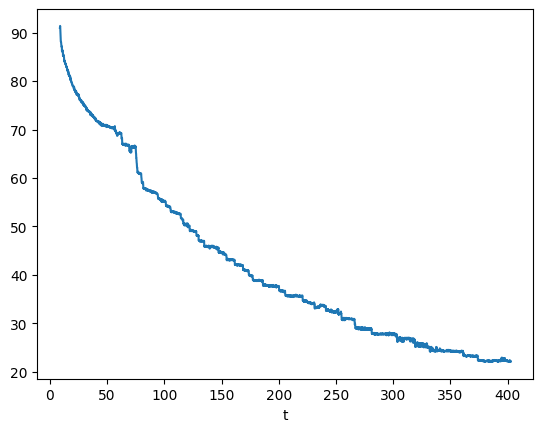

In [90]:
data["Foam Height"].plot()


Linear Regression (Log Fit) Parameters:
Intercept: 4.394541118329215
Coefficient/Foam Decay Rate: -0.0035290029730957813
Mean Squared Error (Log Scale): 0.0029392949247436383
R-squared (Log Scale): 0.9820914894082463
Mean Squared Error (Original Scale, Log Fit): 7.987814597784443
R-squared (Original Scale, Log Fit): 0.9759002095456263

Polynomial Fit (Quadratic) Parameters:
Coefficients: [ 4.38022618e-04 -3.27351523e-01  8.49257139e+01]
Mean Squared Error (Polynomial Fit): 2.1769075487510947
R-squared (Polynomial Fit): 0.992935329068303


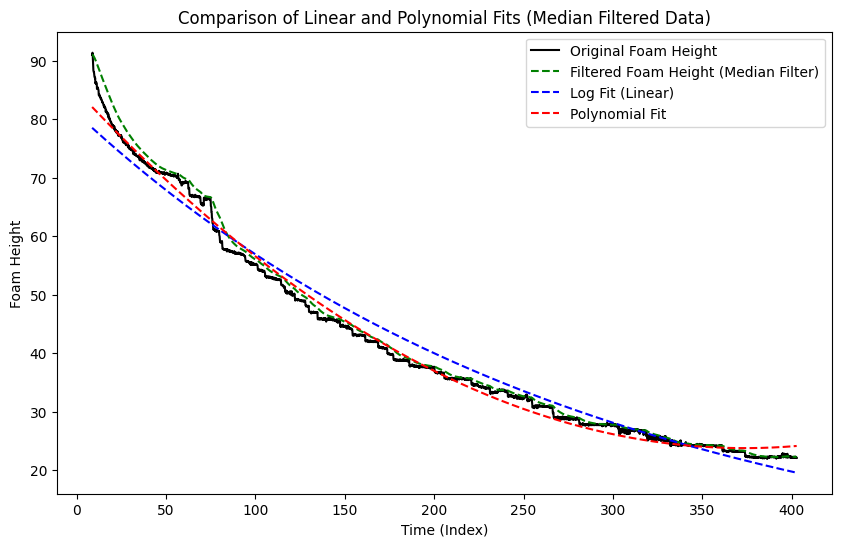

In [95]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.signal import medfilt  # Import median filter
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Initial Data Cleaning (remove NaN or zero/negative values)
data = data.dropna(subset=['Foam Height'])  
data = data[data['Foam Height'] > 0]  

# Step 2: Apply Median Filter for Aggressive Smoothing (choose kernel size for the filter)
data['Filtered_Foam_Height'] = data['Foam Height'].ewm(span=100, adjust=False).mean()


# Step 3: Log Transformation of Filtered Foam Height (store in a new column)
data['Log_Foam_Height'] = np.log(data['Filtered_Foam_Height'])

# Step 4: Set Up Time Variable for Regression (using index)
X = data.index.values.reshape(-1, 1)

# Step 5: Linear Regression on Log-Transformed Foam Height
reg = LinearRegression()
reg.fit(X, data['Log_Foam_Height'])
data['Log_Fit'] = reg.predict(X)

# Step 6: Transform the Log Fit Back to the Original Scale
data['Log_Fit_Original_Scale'] = np.exp(data['Log_Fit'])

# Step 7: Polynomial Fit (quadratic) on the Original Foam Height Data
poly_coeffs = np.polyfit(X.flatten(), data['Foam Height'], 2)  
poly_fit = np.polyval(poly_coeffs, X.flatten())
data['Poly_Fit'] = poly_fit

# Step 8: Model Evaluation
# Linear Regression (Log Fit) Evaluation
y_log_fit = data['Log_Fit']
y_true_log = data['Log_Foam_Height']
mse_log = mean_squared_error(y_true_log, y_log_fit)  # MSE on log scale
r2_log = r2_score(y_true_log, y_log_fit)  # R-squared on log scale

# Transform back the errors on the log scale to the original scale
y_true_original = np.exp(y_true_log)
y_log_fit_original = np.exp(y_log_fit)

# Calculate the error on the original scale
mse_log_original = mean_squared_error(y_true_original, y_log_fit_original)  # MSE on original scale
r2_log_original = r2_score(y_true_original, y_log_fit_original)  # R-squared on original scale

# Polynomial Fit Evaluation
y_poly_fit = data['Poly_Fit']
y_true_poly = data['Foam Height']
mse_poly = mean_squared_error(y_true_poly, y_poly_fit)  # MSE on original scale
r2_poly = r2_score(y_true_poly, y_poly_fit)  # R-squared on original scale

# Print fit evaluation metrics
print("Linear Regression (Log Fit) Parameters:")
print(f"Intercept: {reg.intercept_}")
print(f"Coefficient/Foam Decay Rate: {reg.coef_[0]}")
print(f"Mean Squared Error (Log Scale): {mse_log}")
print(f"R-squared (Log Scale): {r2_log}")
print(f"Mean Squared Error (Original Scale, Log Fit): {mse_log_original}")
print(f"R-squared (Original Scale, Log Fit): {r2_log_original}")

print("\nPolynomial Fit (Quadratic) Parameters:")
print(f"Coefficients: {poly_coeffs}")
print(f"Mean Squared Error (Polynomial Fit): {mse_poly}")
print(f"R-squared (Polynomial Fit): {r2_poly}")

# Step 9: Plotting
# Plot original data and both fits
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Foam Height'], label='Original Foam Height', color='black')
plt.plot(data.index, data['Filtered_Foam_Height'], label='Filtered Foam Height (Median Filter)', color='green', linestyle='--')
plt.plot(data.index, data['Log_Fit_Original_Scale'], label='Log Fit (Linear)', color='blue', linestyle='--')
plt.plot(data.index, data['Poly_Fit'], label='Polynomial Fit', color='red', linestyle='--')
plt.xlabel('Time (Index)')
plt.ylabel('Foam Height')
plt.title('Comparison of Linear and Polynomial Fits (Median Filtered Data)')
plt.legend()
plt.show()


In [76]:
data.head()

,lower y,upper y,Foam Height,IQR_Filtered_Foam_Height,z_score,Z_Score_Filtered_Foam_Height,Filtered_Foam_Height,Log_Foam_Height,Log_Fit,Log_Fit_Original_Scale,Poly_Fit
t,,,,,,,,,,,
8.7,-391.5,-300.5,91.0,91.0,2.803214,NaN,91.082938,4.511770,4.335293,76.347352,82.110910
8.8,-391.5,-300.3,91.2,91.2,2.814607,NaN,91.180030,4.512836,4.334946,76.320825,82.078941
8.9,-391.6,-300.2,91.4,91.4,2.826001,NaN,91.191999,4.512967,4.334598,76.294307,82.046981
9.0,-391.4,-300.3,91.1,91.1,2.808911,NaN,90.901302,4.509774,4.334251,76.267798,82.015030
9.1,-390.6,-300.2,90.4,90.4,2.769034,NaN,90.276083,4.502873,4.333903,76.241298,81.983088
